Here is some code to draw the linear plots we needed in class (this is useful just as a way of more consistantly exploring these things).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array(((2, -2), (-1, 1)))
B = - A
x = np.linspace(0, 1, 100)
column_action_utilities = (np.array((x, 1 - x)).T @ B).T
row_action_utilities = (np.array(A @ (x, 1 - x)).T).T

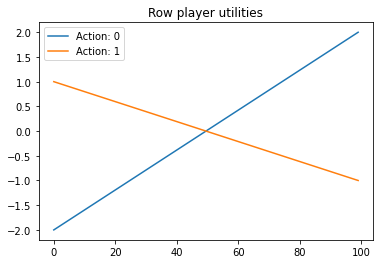

In [3]:
plt.figure()
for row_action, utility in enumerate(row_action_utilities):
    plt.plot(utility, label=f"Action: {row_action}")
plt.legend()
plt.title("Row player utilities");

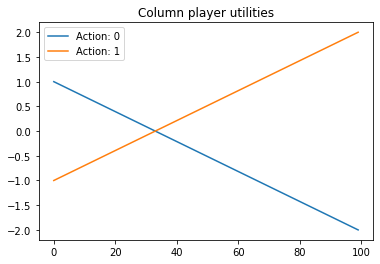

In [4]:
plt.figure()
for column_action, utility in enumerate(column_action_utilities):
    plt.plot(utility, label=f"Action: {column_action}")
plt.legend()
plt.title("Column player utilities");

We can also use nashpy to check if two strategies are best responses to each other. For example, for the modified matching pennies game are the follow two strategies best responses to each other?

\\[\sigma_r=(.2, .8)\qquad \sigma_c=(1, 0)\\]

In [5]:
import nashpy as nash

In [6]:
game = nash.Game(A, B)
sigma_r = np.array((.2, .8))
sigma_c = np.array((1, 0))
game.is_best_response(sigma_r, sigma_c)

(False, True)

We see that \\(\sigma_c=(1,0)\\) is a best response to \\(\sigma_r=(.2, .8)\\) but not the other way around.

So let us modify \\(\sigma_r\\) to be \\(\sigma_r=(1, 0)\\):

In [7]:
sigma_r = np.array((1, 0))
sigma_c = np.array((1, 0))
game.is_best_response(sigma_r, sigma_c)

(True, False)

Now \\(\sigma_r\\) is a best response to \\(\sigma_c\\) but not vice versa.

In fact in this case the only pair of best response we might be able to find are:


\[
\sigma_r=(1 / 3, 2 / 3) \\qquad \sigma_c=(1 / 2, 1 / 2)
\]

In [8]:
sigma_r = np.array((1 / 3, 2 / 3))
sigma_c = np.array((1 / 2, 1 / 2))
game.is_best_response(sigma_r, sigma_c)

(True, True)